# About
ChatGPT translation of myspecexamps.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipj

plt.rcParams.update({
    "lines.linewidth": 2,
    "font.size": 12,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 12,
})


In [2]:
# Parameters
N = 4096 * 2
L = 20

# Spatial grid
z = np.linspace(-1, 1, N + 1)
z = z[:-1]               # truncate
x = z * L
dx = x[1] - x[0]

# Wavenumbers (MATLAB-style ordering)
dk = np.pi / L
ksvec = np.zeros(N)

ksvec[0] = 0
ksvec[N // 2] = 0

for ii in range(1, N // 2):
    ksvec[ii] = ii
    ksvec[N // 2 + ii] = -N // 2 + ii

k = ksvec * dk
k2 = k * k
ik = 1j * k


In [4]:
# One sine
f1 = np.sin(2 * np.pi * x / 2.5)

# Two sines
f2 = 0.5 * np.sin(2 * np.pi * x / 1) + 0.5 * np.sin(2 * np.pi * x / 0.5)

# Gaussian packet
f3 = np.exp(-(x / 4)**2) * np.sin(2 * np.pi * x / 2.5)

# Super-Gaussian packet
f4 = np.exp(-(x / 4)**8) * np.sin(2 * np.pi * x / 0.5)

f5 = np.abs(f1)

# Two packets
f6 = np.exp(-((x - 5) / 4)**2) * np.sin(2 * np.pi * x / 3)
f6 += np.exp(-((x + 5) / 4)**2) * np.sin(2 * np.pi * x / 2)

# Elliptic-function-like signal  # sn, cn, dn, ph
fs, fc, fd, fph = ellipj(x, 0.995)
f7 = np.sin(2 * x) + 0.1 * x


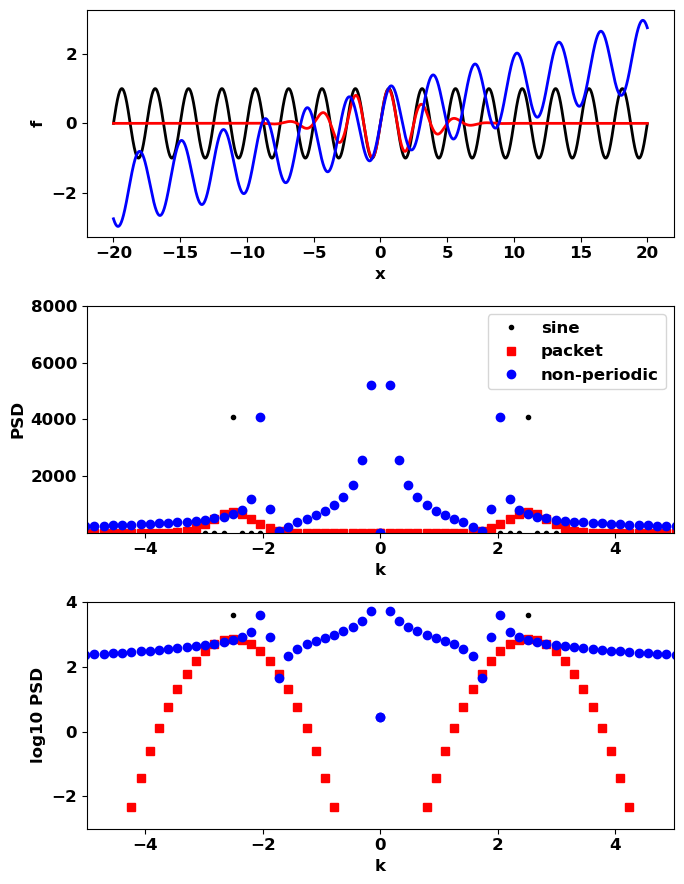

In [5]:
# Basic spectra

plt.figure(1, figsize=(7, 9))
plt.clf()

plt.subplot(3, 1, 1)
plt.plot(x, f1, 'k-', x, f3, 'r-', x, f7, 'b-')
plt.xlabel("x")
plt.ylabel("f")

plt.subplot(3, 1, 2)
plt.plot(k, np.abs(np.fft.fft(f1)), 'k.',
         k, np.abs(np.fft.fft(f3)), 'rs',
         k, np.abs(np.fft.fft(f7)), 'bo')
plt.xlabel("k")
plt.ylabel("PSD")
plt.legend(["sine", "packet", "non-periodic"])
plt.axis([-5, 5, 1e-4, 8e3])

plt.subplot(3, 1, 3)
plt.plot(k, np.log10(np.abs(np.fft.fft(f1))), 'k.',
         k, np.log10(np.abs(np.fft.fft(f3))), 'rs',
         k, np.log10(np.abs(np.fft.fft(f7))), 'bo')
plt.xlabel("k")
plt.ylabel("log10 PSD")
plt.axis([-5, 5, -3, 4])

plt.tight_layout()


/tmp/ipykernel_16976/3170802396.py:26: RuntimeWarning: divide by zero encountered in log10
  k, np.log10(np.abs(np.fft.fft(f7w))), 'rs')


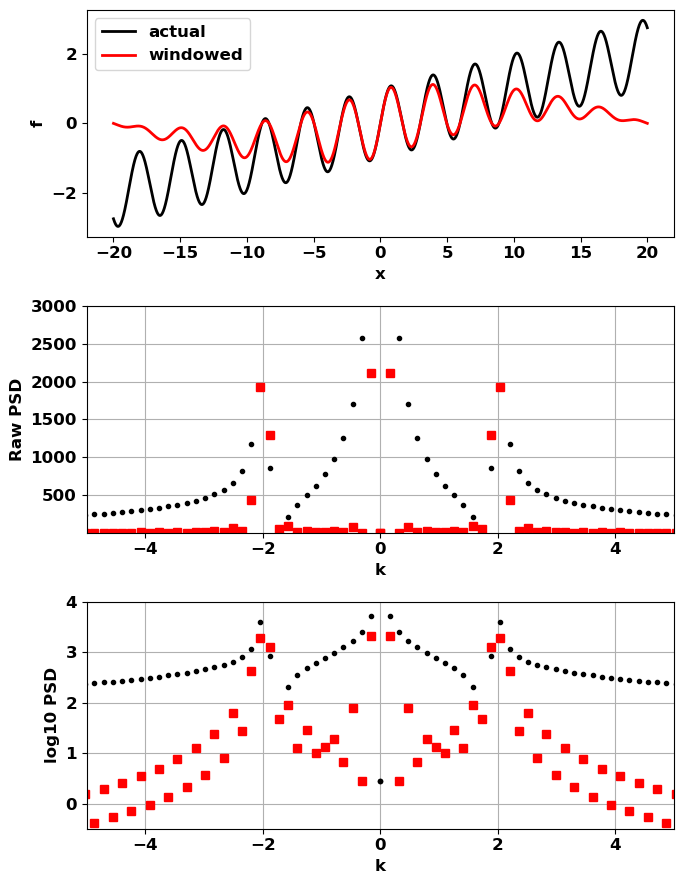

In [6]:
# Windowing example

No2 = N // 2
mywin = np.concatenate((np.arange(No2), np.arange(No2, 0, -1))) / No2
f7w = mywin * f7

plt.figure(2, figsize=(7, 9))
plt.clf()

plt.subplot(3, 1, 1)
plt.plot(x, f7, 'k-', x, f7w, 'r-')
plt.legend(["actual", "windowed"])
plt.xlabel("x")
plt.ylabel("f")

plt.subplot(3, 1, 2)
plt.plot(k, np.abs(np.fft.fft(f7)), 'k.',
         k, np.abs(np.fft.fft(f7w)), 'rs')
plt.xlabel("k")
plt.ylabel("Raw PSD")
plt.axis([-5, 5, 1e-4, 3e3])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(k, np.log10(np.abs(np.fft.fft(f7))), 'k.',
         k, np.log10(np.abs(np.fft.fft(f7w))), 'rs')
plt.xlabel("k")
plt.ylabel("log10 PSD")
plt.axis([-5, 5, -0.5, 4])
plt.grid(True)

plt.tight_layout()


In [7]:
# Variance reduction via segment averaging

No4 = N // 4
mywin = np.concatenate((np.arange(No4 // 2),
                         np.arange(No4 // 2, 0, -1))) / (No4 // 2)

myspec = np.zeros(No4)

for ii in range(4):
    fnow = mywin * f7[ii * No4:(ii + 1) * No4]
    myspec += np.abs(np.fft.fft(fnow))

dk4 = 4 * np.pi / L
ksvec = np.zeros(No4)
ksvec[0] = 0
ksvec[No4 // 2] = 0

for ii in range(1, No4 // 2):
    ksvec[ii] = ii
    ksvec[No4 // 2 + ii] = -No4 // 2 + ii

k4 = ksvec * dk4


/tmp/ipykernel_16976/1132953136.py:22: RuntimeWarning: divide by zero encountered in log10
  k, np.log10(np.abs(np.fft.fft(f7w))), 'rs')


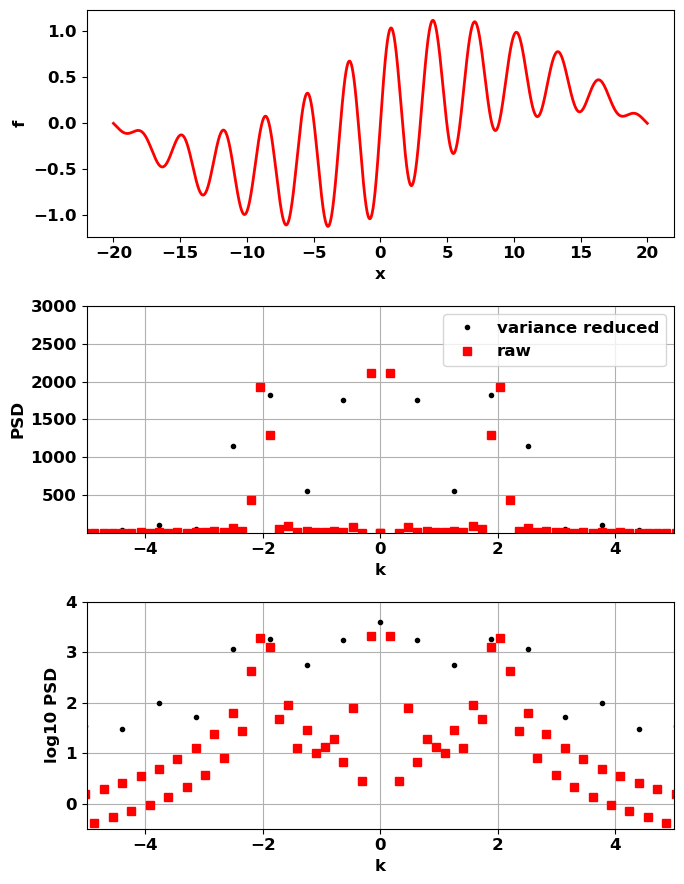

In [8]:
# Compare raw vs variance-reduced spectra

plt.figure(3, figsize=(7, 9))
plt.clf()

plt.subplot(3, 1, 1)
plt.plot(x, f7w, 'r-')
plt.xlabel("x")
plt.ylabel("f")

plt.subplot(3, 1, 2)
plt.plot(k4, myspec, 'k.',
         k, np.abs(np.fft.fft(f7w)), 'rs')
plt.xlabel("k")
plt.ylabel("PSD")
plt.legend(["variance reduced", "raw"])
plt.axis([-5, 5, 1e-4, 3e3])
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(k4, np.log10(myspec), 'k.',
         k, np.log10(np.abs(np.fft.fft(f7w))), 'rs')
plt.xlabel("k")
plt.ylabel("log10 PSD")
plt.axis([-5, 5, -0.5, 4])
plt.grid(True)

plt.tight_layout()


/tmp/ipykernel_16976/2911188164.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(k, np.log10(spec0sm), 'k.-', k, np.log10(spec0), 'rs-')


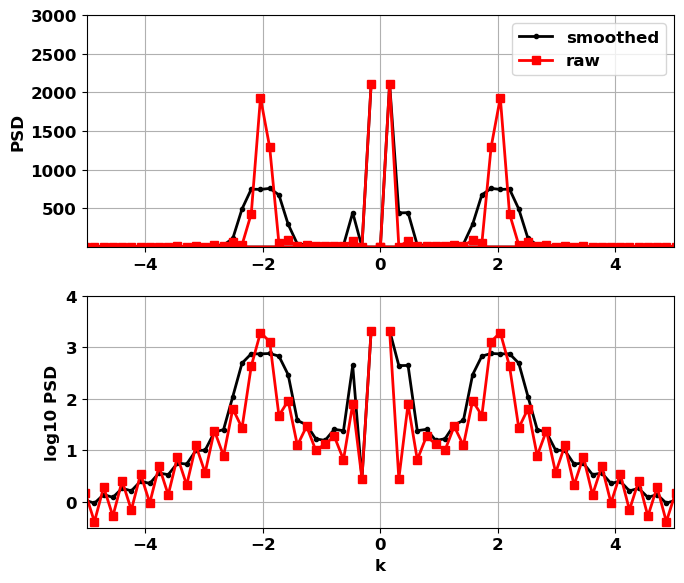

In [9]:
# Spectral smoothing

spec0 = np.abs(np.fft.fft(f7w))
spec0sm = spec0.copy()

for ii in range(2, N - 2):
    spec0sm[ii] = np.mean(spec0[ii - 2:ii + 3])

plt.figure(4, figsize=(7, 6))
plt.clf()

plt.subplot(2, 1, 1)
plt.plot(k, spec0sm, 'k.-', k, spec0, 'rs-')
plt.ylabel("PSD")
plt.legend(["smoothed", "raw"])
plt.axis([-5, 5, 1e-4, 3e3])
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(k, np.log10(spec0sm), 'k.-', k, np.log10(spec0), 'rs-')
plt.ylabel("log10 PSD")
plt.xlabel("k")
plt.axis([-5, 5, -0.5, 4])
plt.grid(True)

plt.tight_layout()
